<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/NEO_Classification_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 3 CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's Data Preprocessing lecture video and Data Preprocessing Example)

# Assignment 3: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Removing Missing Values:

The dataset I will be using is Near Earth Objects (NEO). The dataset doesn't appear to contain significant amounts of data issues, but I will try to use the provided code examples to ensure I am using clean data. The following lines of code imports the dataset and establishes the column names that the data will be presented under.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/neo_namesremoved.csv', header=None)
data.columns = ['id', 'Name', 'est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object','absolute_magnitude', 'hazardous']

print('Total Number of Records:  %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records:  90836
Total Number of Features: 10


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will check the dataset for missing values. The dataset I am using does not appear to have any missing values.

In [4]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 90836
Total Number of Features: 10
Total Number of missing values:

id: 0

Name: 0

est_diameter_min: 0

est_diameter_max: 0

relative_velocity: 0

miss_distance: 0

orbiting_body: 0

sentry_object: 0

absolute_magnitude: 0

hazardous: 0


The next line of code is an additional way to check for missing data. Again, the results display no missing data.

In [5]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))
data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 90836
Total number of rows after dropping missing values: 90836


#Checking for Outliers:

First, I will display the first five rows of the data I am checking.

In [6]:
data2.head()

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will use box plots to check for any outliers. It's important to remember to drop any non-numeric datatypes prior to plotting the data.

In [7]:
%matplotlib inline

data2 = data.drop(['Name','orbiting_body','sentry_object','hazardous'],axis=1)
data2.dtypes


id                      int64
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
dtype: object

After removing the columns that contained strings, each column contains numeric values.

<Axes: >

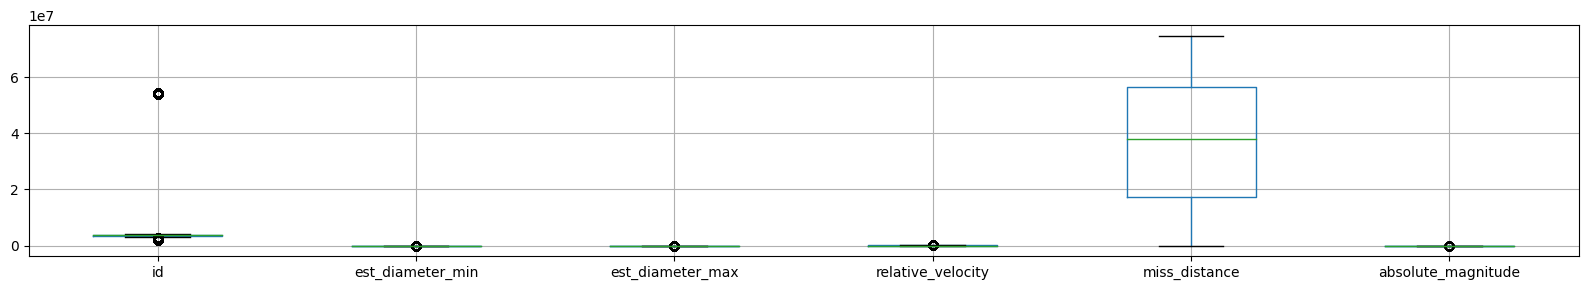

In [8]:
data2.boxplot(figsize=(20,3))

When evaluating the boxplot listed above, the only outlier appears to be in the id column. I will attempt to resolve it with the following lines of code:

In [9]:
Z = (data2-data2.mean())/data2.std()
Z[1:90836]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
1,-0.579982,0.463527,0.463527,1.009034,1.090351,-1.218728
2,-0.568734,1.991876,1.991876,2.616969,0.569620,-1.968533
3,-0.516809,-0.103601,-0.103601,-0.921296,-0.520381,-0.458557
4,-0.513403,0.427376,0.427376,-0.210696,0.411999,-1.187630
5,1.904742,-0.305107,-0.305107,-0.544387,0.157442,0.273971
...,...,...,...,...,...,...
90831,-0.508793,-0.337850,-0.337850,0.158618,-1.108004,0.508933
90832,-0.505235,-0.370711,-0.370711,-0.077187,0.771950,0.854466
90833,1.898921,-0.319840,-0.319840,-1.601219,-0.387695,0.370720
90834,1.903647,-0.402368,-0.402368,0.835488,1.414883,1.476424


In [11]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Total number of rows after removing outliers: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 90836
Total number of rows after removing outliers: 0


As you can see, it didn't appear to remove any outliers that exceeded the minimum and maximum values.

#Checking for Duplicates:

First, I will check for duplicates.

In [12]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 0


As you can see, there were no duplicates.

#Sampling:

First, I will display the first five rows of data.

In [13]:
data.head()

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will sample the data randomly choosing three rows.

In [15]:
sample = data.sample(n=3)
sample

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
76876,3758839,(2016 QA84),0.101054,0.225964,67432.66033,19716144.07,Earth,False,22.1,False
13197,3785681,(2017 TU1),0.016771,0.037501,61083.35466,73470015.95,Earth,False,26.0,False
27429,3789744,(2017 WE28),0.012149,0.027167,38912.09656,11482802.02,Earth,False,26.7,False


Next, I will sample the data at one percent without replacement.

In [16]:
sample = data.sample(frac=0.01, random_state=1)
sample


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
12801,3663258,(2014 EL),0.010582,0.023661,67869.92523,3.379682e+07,Earth,False,27.00,False
55325,3831894,(2018 UH1),0.025384,0.056760,46806.04991,2.042376e+06,Earth,False,25.10,False
2647,3552664,(2010 WC9),0.053034,0.118588,73992.58886,4.700788e+07,Earth,False,23.50,False
48068,3843919,(2019 SU1),0.005553,0.012418,10954.65422,2.392963e+07,Earth,False,28.40,False
41662,2511684,511684 (2015 BN509),0.183044,0.409298,96979.03827,4.103778e+07,Earth,False,20.81,True
...,...,...,...,...,...,...,...,...,...,...
12936,3515380,(2010 GL23),0.073207,0.163697,52851.13755,2.201863e+07,Earth,False,22.80,False
10437,3394754,(2007 VF189),0.005815,0.013003,30272.62582,6.758285e+07,Earth,False,28.30,False
8074,3703074,(2014 YT15),0.009651,0.021579,15404.67801,3.976412e+07,Earth,False,27.20,False
54568,3719245,(2015 KF),0.025384,0.056760,33467.42420,3.121676e+07,Earth,False,25.10,False


Next, I will sample the data at one percent with replacement to evaluate the results.

In [17]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
77708,3878564,(2019 TP1),0.160160,0.358129,84840.24857,7.194800e+07,Earth,False,21.10,True
5192,3758270,(2016 QE45),0.117099,0.261842,58978.62703,2.326581e+06,Earth,False,21.78,True
50057,3781911,(2017 SL17),0.105817,0.236614,51161.60720,1.619446e+07,Earth,False,22.00,True
73349,54114207,(2021 CE5),0.021113,0.047211,55483.58092,1.806974e+07,Earth,False,25.50,False
21440,3471585,(2009 UC),0.012722,0.028447,48802.95901,9.377322e+06,Earth,False,26.60,False
...,...,...,...,...,...,...,...,...,...,...
32293,3704767,(2015 BE92),0.006376,0.014257,72451.27247,6.887751e+07,Earth,False,28.10,False
70831,2455199,455199 (2000 YK4),0.291444,0.651688,48766.26520,5.859091e+07,Earth,False,19.80,False
27988,3465283,(2009 OY7),0.029144,0.065169,55905.74198,5.448388e+06,Earth,False,24.80,False
28431,54196397,(2021 RG14),0.046404,0.103762,17019.39089,7.271360e+07,Earth,False,23.79,False


#Findings:

The classification dataset I chose had mostly clean data. The dataset didn’t contain missing data. It also didn’t contain any outliers, other than the id column which contained non-measured data. The dataset didn’t contain duplicates, and the results from sampling confirmed the previously mentioned results when randomly sampling the data.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's example: https://blackboard.ecok.edu/webapps/blackboard/execute/displayLearningUnit?course_id=_24357_1&content_id=_2338686_1&framesetWrapped=true